# Interannual variability

In [1]:
%matplotlib inline
%config InlineBackend.figure_format='retina'

import matplotlib.pyplot as plt
import xarray as xr
import numpy as np

import IPython.display
import cmocean as cm
import cartopy.crs as ccrs
from xhistogram.xarray import histogram
import pandas as pd

In [2]:
import cosima_cookbook as cc

In [3]:
session = cc.database.create_session('/scratch/e14/cy8964/access-om2/archive/databases/1deg_jra55_ryf_experiments_3.db')

In [10]:
expt = '1deg_jra55_ryf_RCPwarmhumid'
variable = 'temp_global_ave'
darray_warm = cc.querying.getvar(expt, variable, session, ncfile = 'ocean_scalar.nc')
darray_warm
annual_average_warm = darray_warm.groupby('time.year').mean(dim='time')
darray_swarm = cc.querying.getvar(expt, 'temp_surface_ave', session)
annual_average_swarm = darray_swarm.groupby('time.year').mean(dim='time')
temp_warm = cc.querying.getvar(expt, 'temp', session, ncfile = 'ocean.nc')
annual_SST_warm = temp_warm.isel(st_ocean = 0).groupby('time.year').mean(dim='time')
surface_heat_flux_warm = cc.querying.getvar(expt,'net_sfc_heating',session).groupby('time.year').sum(dim='time')
mld_warm = cc.querying.getvar(expt,'mld',session).groupby('time.year').mean(dim='time')
mld_warm1 = cc.querying.getvar(expt,'mld',session)

age_warm = cc.querying.getvar(expt,'age_global',session).groupby('time.year').mean(dim='time')
pot_rho_warm = cc.querying.getvar(expt,'pot_rho_2',session).groupby('time.year').mean(dim='time')
salt_warm = cc.querying.getvar(expt,'salt',session).groupby('time.year').mean(dim='time')
dzt_warm = cc.querying.getvar(expt,'dzt',session, ncfile = 'ocean_heat.nc').groupby('time.year').mean(dim='time')
area_t_warm = cc.querying.getvar(expt,'area_t',session, n=-1)
SST_warm = cc.querying.getvar(expt,'temp',session, ncfile = 'ocean_heat.nc').isel(st_ocean = 0)


In [11]:
expt = '1deg_jra55_ryf_RCPcoolhumid'
variable = 'temp_global_ave'
darray_cool = cc.querying.getvar(expt, variable, session, ncfile = 'ocean_scalar.nc')
annual_average_cool = darray_cool.groupby('time.year').mean(dim='time')
darray_scool = cc.querying.getvar(expt, 'temp_surface_ave', session)
annual_average_scool = darray_scool.groupby('time.year').mean(dim='time')
temp_cool = cc.querying.getvar(expt, 'temp', session, ncfile = 'ocean.nc')
annual_SST_cool = temp_cool.isel(st_ocean = 0).groupby('time.year').mean(dim='time')
surface_heat_flux_cool= cc.querying.getvar(expt,'net_sfc_heating',session).groupby('time.year').sum(dim='time')
mld_cool = cc.querying.getvar(expt,'mld',session).groupby('time.year').mean(dim='time')
mld_cool1 = cc.querying.getvar(expt,'mld',session)

age_cool = cc.querying.getvar(expt,'age_global',session).groupby('time.year').mean(dim='time')
pot_rho_cool = cc.querying.getvar(expt,'pot_rho_2',session).groupby('time.year').mean(dim='time')
salt_cool = cc.querying.getvar(expt,'salt',session).groupby('time.year').mean(dim='time')
dzt_cool = cc.querying.getvar(expt,'dzt',session, ncfile = 'ocean_heat.nc').groupby('time.year').mean(dim='time')
area_t_cool = cc.querying.getvar(expt,'area_t',session, n=-1)
SST_cool = cc.querying.getvar(expt,'temp',session, ncfile = 'ocean_heat.nc').isel(st_ocean = 0)

In [12]:
expt = '1deg_jra55_ryf_RCPcont'
variable = 'temp_global_ave'
darray_cont = cc.querying.getvar(expt, variable, session, ncfile = 'ocean_scalar.nc')
annual_average_cont = darray_cont.groupby('time.year').mean(dim='time')
darray_scont = cc.querying.getvar(expt, 'temp_surface_ave', session)
annual_average_scont = darray_scont.groupby('time.year').mean(dim='time')
temp_cont = cc.querying.getvar(expt, 'temp', session, ncfile = 'ocean.nc')
annual_SST_cont = temp_cont.isel(st_ocean = 0).groupby('time.year').mean(dim='time')
surface_heat_flux_cont= cc.querying.getvar(expt,'net_sfc_heating',session).groupby('time.year').sum(dim='time')
mld_cont = cc.querying.getvar(expt,'mld',session).groupby('time.year').mean(dim='time')
mld_cont1 = cc.querying.getvar(expt,'mld',session)

age_cont = cc.querying.getvar(expt,'age_global',session).groupby('time.year').mean(dim='time')
pot_rho_cont = cc.querying.getvar(expt,'pot_rho_2',session).groupby('time.year').mean(dim='time')
salt_cont = cc.querying.getvar(expt,'salt',session).groupby('time.year').mean(dim='time')
salt_cont = cc.querying.getvar(expt,'salt',session).groupby('time.year').mean(dim='time')
dzt_cont = cc.querying.getvar(expt,'dzt',session, ncfile = 'ocean_heat.nc').groupby('time.year').mean(dim='time')
area_t_cont= cc.querying.getvar(expt,'area_t',session, n=-1)
SST_cont = cc.querying.getvar(expt,'temp',session, ncfile = 'ocean_heat.nc').isel(st_ocean = 0)


In [13]:
expt = '1deg_jra55_ryf_RCPcwcw'
variable = 'temp_global_ave'
darray_cwcw = cc.querying.getvar(expt, variable, session, ncfile = 'ocean_scalar.nc')
annual_average_cwcw = darray_cwcw.groupby('time.year').mean(dim='time')
darray_scwcw = cc.querying.getvar(expt, 'temp_surface_ave', session)
annual_average_scwcw = darray_scwcw.groupby('time.year').mean(dim='time')
temp_cwcw = cc.querying.getvar(expt, 'temp', session, ncfile = 'ocean.nc')
annual_SST_cwcw = temp_cwcw.isel(st_ocean = 0).groupby('time.year').mean(dim='time')
surface_heat_flux_cwcw= cc.querying.getvar(expt,'net_sfc_heating',session).groupby('time.year').sum(dim='time')
mld_cwcw = cc.querying.getvar(expt,'mld',session).groupby('time.year').mean(dim='time')
mld_cwcw1 = cc.querying.getvar(expt,'mld',session)

age_cwcw = cc.querying.getvar(expt,'age_global',session).groupby('time.year').mean(dim='time')
pot_rho_cwcw = cc.querying.getvar(expt,'pot_rho_2',session).groupby('time.year').mean(dim='time')
salt_cwcw = cc.querying.getvar(expt,'salt',session).groupby('time.year').mean(dim='time')
salt_cwcw = cc.querying.getvar(expt,'salt',session).groupby('time.year').mean(dim='time')
dzt_cwcw = cc.querying.getvar(expt,'dzt',session, ncfile = 'ocean_heat.nc').groupby('time.year').mean(dim='time')
area_t_cwcw= cc.querying.getvar(expt,'area_t',session, n=-1)
SST_cwcw = cc.querying.getvar(expt,'temp',session, ncfile = 'ocean_heat.nc').isel(st_ocean = 0)


In [14]:
expt = '1deg_jra55_ryf_RCPwcwc'
variable = 'temp_global_ave'
darray_wcwc = cc.querying.getvar(expt, variable, session, ncfile = 'ocean_scalar.nc')
annual_average_wcwc = darray_wcwc.groupby('time.year').mean(dim='time')
darray_swcwc = cc.querying.getvar(expt, 'temp_surface_ave', session)
annual_average_swcwc = darray_swcwc.groupby('time.year').mean(dim='time')
temp_wcwc = cc.querying.getvar(expt, 'temp', session, ncfile = 'ocean.nc')
annual_SST_wcwc = temp_wcwc.isel(st_ocean = 0).groupby('time.year').mean(dim='time')
surface_heat_flux_wcwc= cc.querying.getvar(expt,'net_sfc_heating',session).groupby('time.year').sum(dim='time')
mld_wcwc = cc.querying.getvar(expt,'mld',session).groupby('time.year').mean(dim='time')
mld_wcwc1 = cc.querying.getvar(expt,'mld',session)

age_wcwc = cc.querying.getvar(expt,'age_global',session).groupby('time.year').mean(dim='time')
pot_rho_wcwc = cc.querying.getvar(expt,'pot_rho_2',session).groupby('time.year').mean(dim='time')
salt_wcwc = cc.querying.getvar(expt,'salt',session).groupby('time.year').mean(dim='time')
salt_wcwc = cc.querying.getvar(expt,'salt',session).groupby('time.year').mean(dim='time')
dzt_wcwc = cc.querying.getvar(expt,'dzt',session, ncfile = 'ocean_heat.nc').groupby('time.year').mean(dim='time')
area_t_wcwc= cc.querying.getvar(expt,'area_t',session, n=-1)
SST_wcwc = cc.querying.getvar(expt,'temp',session, ncfile = 'ocean_heat.nc').isel(st_ocean = 0)


Text(0.5, 1.0, 'Global average temperature (seasonality removed)')

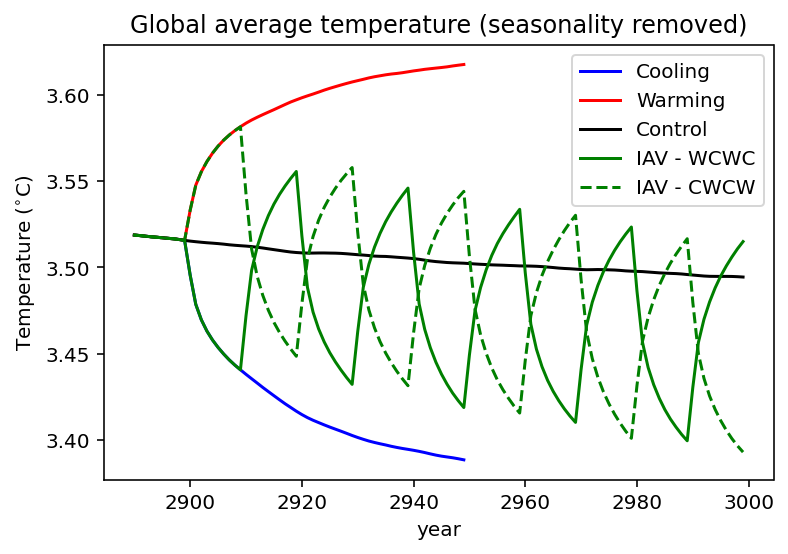

In [9]:
annual_average_cool.plot(label='Cooling', color = 'b')
annual_average_warm.plot(label='Warming', color = 'r')
annual_average_cont.plot(label='Control',color = 'k')
annual_average_cwcw.plot(label='IAV - WCWC',color = 'g')
annual_average_wcwc.plot(label='IAV - CWCW',color = 'g', linestyle = '--')


plt.legend()
plt.ylabel('Temperature ($^{\circ}$C)')
plt.title('Global average temperature (seasonality removed)')

Text(0.5, 1.0, '(b) Global average SST')

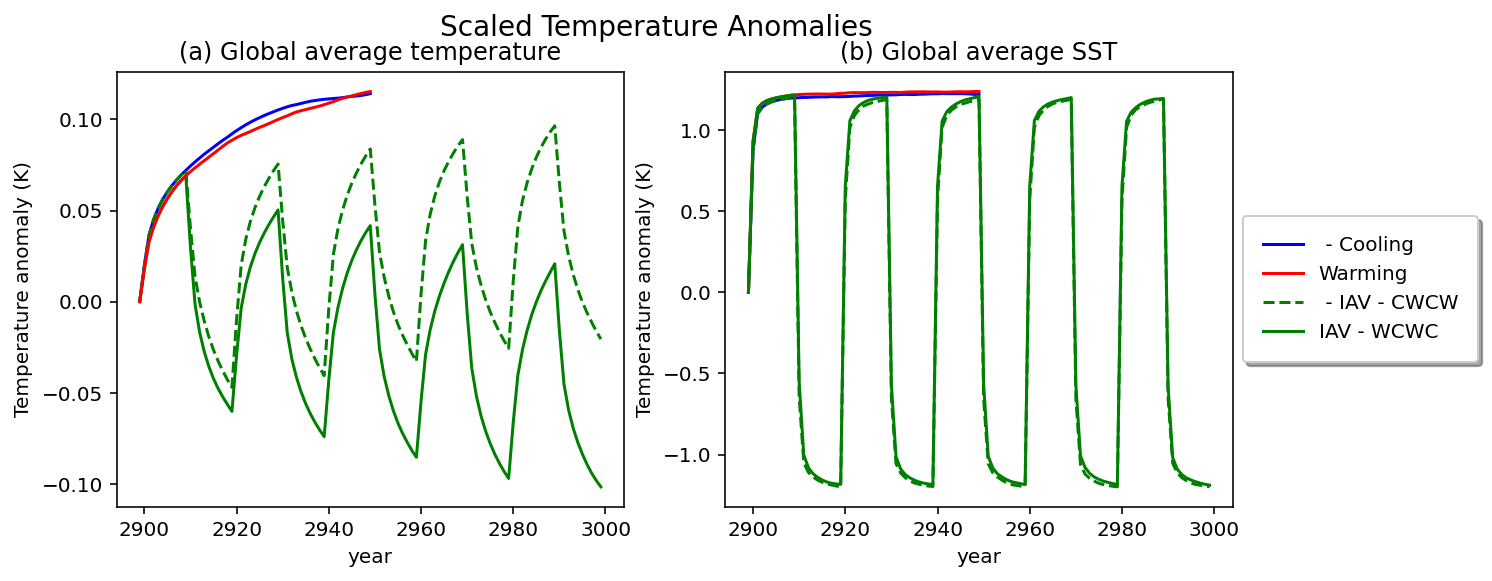

In [11]:
fig, axes = plt.subplots(ncols=2, nrows=1, figsize = (10,4))
plt.suptitle('Scaled Temperature Anomalies', fontsize = 14)

((annual_average_cool*(-1)-annual_average_cont*(-1)).sel(year = slice(2899,2999))).plot(label=' - Cooling',color = 'b', ax = axes[0])
((annual_average_cwcw*(-1)-annual_average_cont*(-1)).sel(year = slice(2899,2999))).plot(label=' - IAV - CWCW',color = 'g', ax = axes[0], linestyle = '--')
(annual_average_wcwc-annual_average_cont).sel(year = slice(2899,2999)).plot(label='IAV - WCWC', color = 'g', ax = axes[0])
(annual_average_warm-annual_average_cont).sel(year = slice(2899,2999)).plot(label='Warming', color = 'r', ax = axes[0])

((annual_average_scool*(-1)-annual_average_scont*(-1)).sel(year = slice(2899,2999))).plot(label=' - Cooling',color = 'b', ax = axes[1])
(annual_average_swarm-annual_average_scont).sel(year = slice(2899,2999)).plot(label='Warming', color = 'r', ax = axes[1])
((annual_average_scwcw*(-1)-annual_average_scont*(-1)).sel(year = slice(2899,2999))).plot(label=' - IAV - CWCW',color = 'g', ax = axes[1], linestyle = '--')
(annual_average_swcwc-annual_average_scont).sel(year = slice(2899,2999)).plot(label='IAV - WCWC', color = 'g', ax = axes[1])

axes[1].legend(fancybox=True, framealpha=1, shadow=True, borderpad=1,bbox_to_anchor=(1, 0.5),loc = 'center left')


axes[0].set_ylabel('Temperature anomaly (K)')
axes[1].set_ylabel('Temperature anomaly (K)')
axes[0].set_title('(a) Global average temperature')
axes[1].set_title('(b) Global average SST')

In [42]:
import scipy.stats as stats
import scipy.optimize as optimize

In [70]:
x = (annual_average_wcwc-annual_average_cont).sel(year = slice(2899,2999)).year
y = np.ndarray.flatten((annual_average_wcwc-annual_average_cont).sel(year = slice(2899,2999)).values)

In [71]:
y

array([ 0.        ,  0.01799016,  0.03280191,  0.04092915,  0.04714731,
        0.05224496,  0.05661096,  0.06038514,  0.06371361,  0.06655873,
        0.06905717,  0.0300966 , -0.00148328, -0.01686264, -0.02749502,
       -0.03566934, -0.04224894, -0.0476376 , -0.05221402, -0.05631352,
       -0.0602141 , -0.0295649 , -0.00361142,  0.00959686,  0.01906621,
        0.02646744,  0.03251306,  0.03765476,  0.04230086,  0.04645126,
        0.05032775,  0.01292957, -0.01715092, -0.03158757, -0.04161454,
       -0.04953085, -0.05604962, -0.06148352, -0.0661776 , -0.07033925,
       -0.07410984, -0.04315522, -0.01691947, -0.00303836,  0.00735039,
        0.01574979,  0.02266411,  0.02851193,  0.03351202,  0.03791623,
        0.04173212,  0.00423517, -0.026142  , -0.04094987, -0.05149179,
       -0.05981978, -0.06666307, -0.07226967, -0.07710627, -0.08155079,
       -0.08541644, -0.05475002, -0.02879701, -0.01526142, -0.00508217,
        0.0031618 ,  0.01020666,  0.01642541,  0.02195522,  0.02

In [72]:
fitfunc = lambda x, p0, p1: p0*x + p1 

In [73]:
pout = optimize.curve_fit(fitfunc, x, y)

In [74]:
popt = pout[0]
pcov = pout[1]

a = popt[0]
b = popt[1]

delta_a = np.sqrt(pcov[0][0])
delta_b = np.sqrt(pcov[1][1])

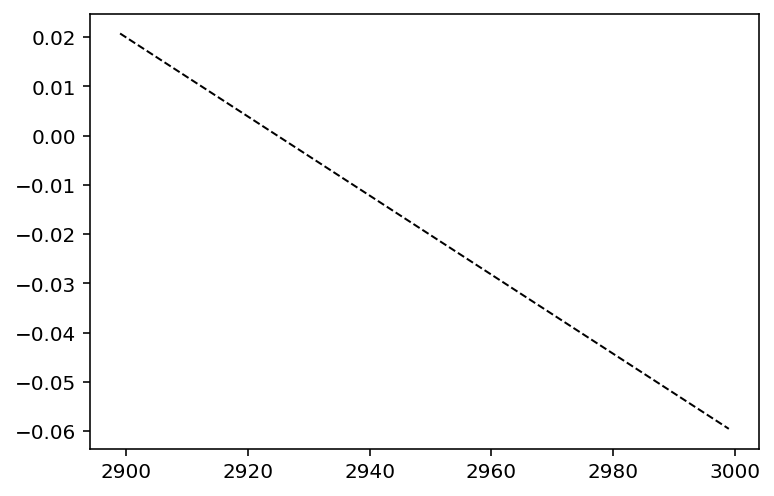

In [75]:
plt.plot(x, fitfunc(x, a, b), linewidth=1, color='black', linestyle = '--')


In [76]:
x = (annual_average_cwcw-annual_average_cont).sel(year = slice(2899,2999)).year
y =np.ndarray.flatten(((annual_average_cwcw*(-1)-annual_average_cont*(-1)).sel(year = slice(2899,2999))).values)

In [77]:
fitfunc2 = lambda x, p0, p1: p0*x + p1 

In [78]:
pout2 = optimize.curve_fit(fitfunc2, x, y)

In [79]:
popt2 = pout2[0]
pcov2 = pout2[1]

a2 = popt2[0]
b2 = popt2[1]

delta_a2 = np.sqrt(pcov2[0][0])
delta_b2 = np.sqrt(pcov2[1][1])

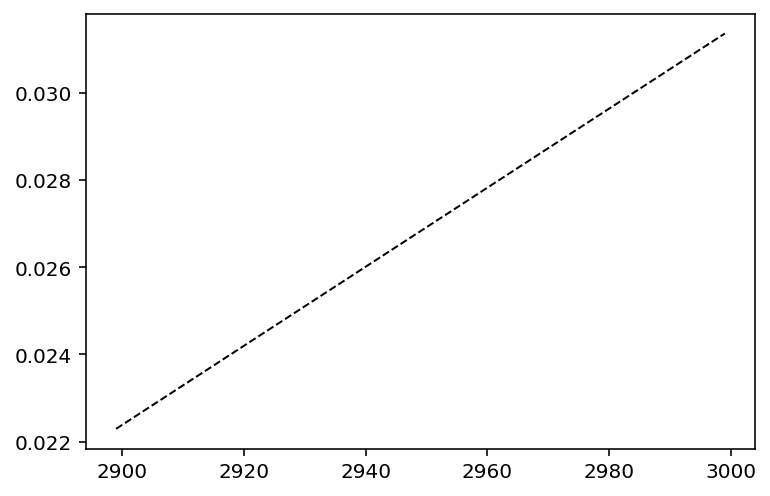

In [80]:
plt.plot(x, fitfunc(x, a2, b2), linewidth=1, color='black', linestyle = '--')


Text(0.5, 1.0, '(b) Global average SST')

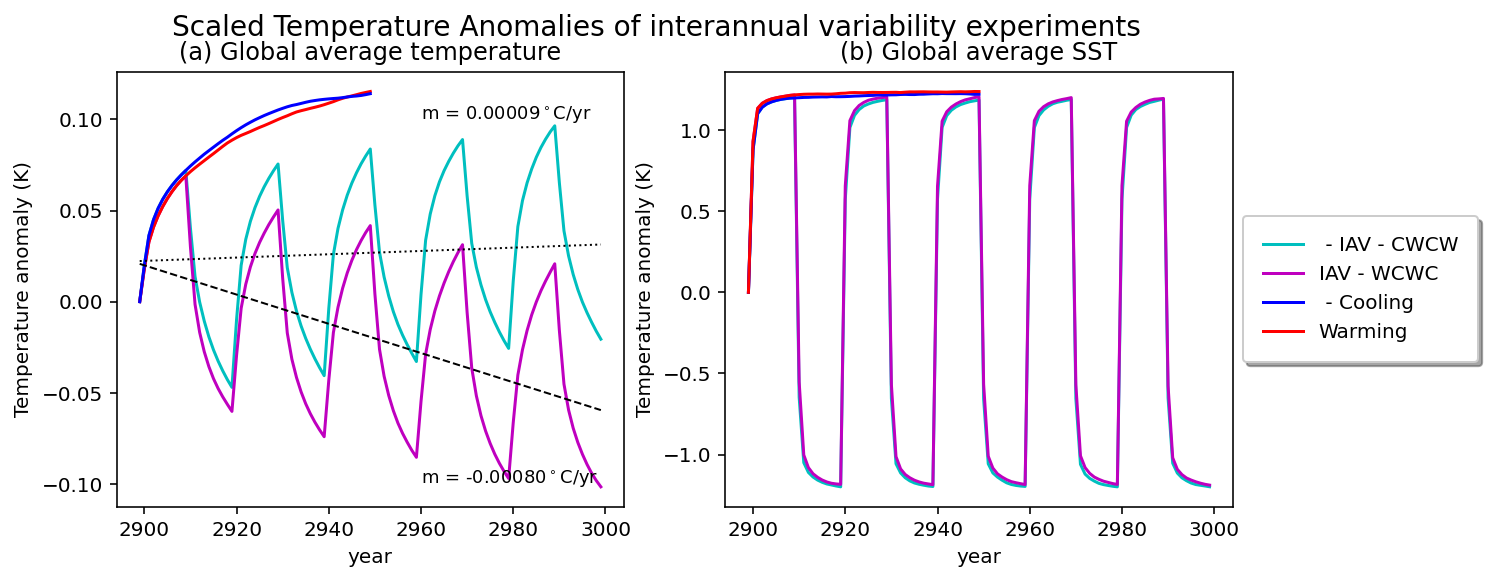

In [85]:
fig, axes = plt.subplots(ncols=2, nrows=1, figsize = (10,4))
plt.suptitle('Scaled Temperature Anomalies of interannual variability experiments', fontsize = 14)

((annual_average_cwcw*(-1)-annual_average_cont*(-1)).sel(year = slice(2899,2999))).plot(label=' - IAV - CWCW',color = 'c', ax = axes[0])
(annual_average_wcwc-annual_average_cont).sel(year = slice(2899,2999)).plot(label='IAV - WCWC', color = 'm', ax = axes[0])
(annual_average_warm-annual_average_cont).sel(year = slice(2899,2999)).plot(label='Warming', color = 'r', ax = axes[0])
((annual_average_cool*(-1)-annual_average_cont*(-1)).sel(year = slice(2899,2999))).plot(label=' - Cooling',color = 'b', ax = axes[0])

((annual_average_scwcw*(-1)-annual_average_scont*(-1)).sel(year = slice(2899,2999))).plot(label=' - IAV - CWCW',color = 'c', ax = axes[1])
(annual_average_swcwc-annual_average_scont).sel(year = slice(2899,2999)).plot(label='IAV - WCWC', color = 'm', ax = axes[1])
((annual_average_scool*(-1)-annual_average_scont*(-1)).sel(year = slice(2899,2999))).plot(label=' - Cooling',color = 'b', ax = axes[1])
(annual_average_swarm-annual_average_scont).sel(year = slice(2899,2999)).plot(label='Warming', color = 'r', ax = axes[1])
axes[0].plot(x, fitfunc(x, a, b), linewidth=1, color='black', linestyle = '--')
axes[0].text(2960, -0.1, 'm = %5.5f$^\circ$C/yr' % (a), fontsize=9)
axes[0].plot(x, fitfunc(x, a2, b2), linewidth=1, color='black', linestyle = 'dotted')
axes[0].text(2960, +0.1, 'm = %5.5f$^\circ$C/yr' % (a2), fontsize=9)

axes[1].legend(fancybox=True, framealpha=1, shadow=True, borderpad=1,bbox_to_anchor=(1, 0.5),loc = 'center left')



axes[0].set_ylabel('Temperature anomaly (K)')
axes[1].set_ylabel('Temperature anomaly (K)')
axes[0].set_title('(a) Global average temperature')
axes[1].set_title('(b) Global average SST')

# mld vol

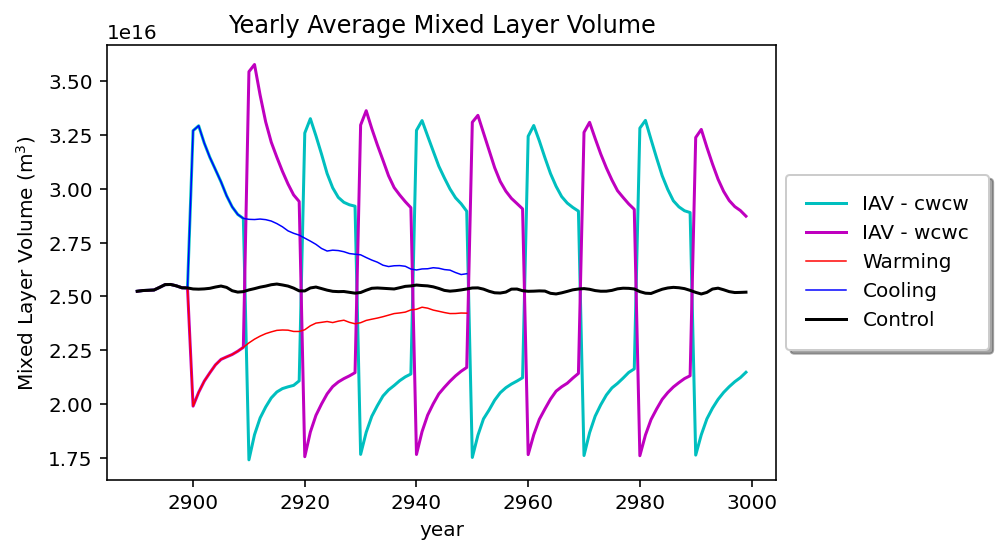

In [17]:
fig = plt.figure()
(mld_cwcw*area_t_cont).sum('xt_ocean').sum('yt_ocean').plot(label='IAV - cwcw',color = 'c')
(mld_wcwc*area_t_cont).sum('xt_ocean').sum('yt_ocean').plot(label='IAV - wcwc',color = 'm')
(mld_warm*area_t_cont).sum('xt_ocean').sum('yt_ocean').plot(label='Warming',color = 'r', linewidth = 0.75)
(mld_cool*area_t_cont).sum('xt_ocean').sum('yt_ocean').plot(label='Cooling',color = 'b', linewidth = 0.75)
(mld_cont*area_t_cont).sum('xt_ocean').sum('yt_ocean').plot(label='Control',color = 'k')

plt.ylabel('Mixed Layer Volume (m$^3$)')
plt.title('Yearly Average Mixed Layer Volume')
plt.legend(fancybox=True, framealpha=1, shadow=True, borderpad=1,bbox_to_anchor=(1, 0.5),loc = 'center left')


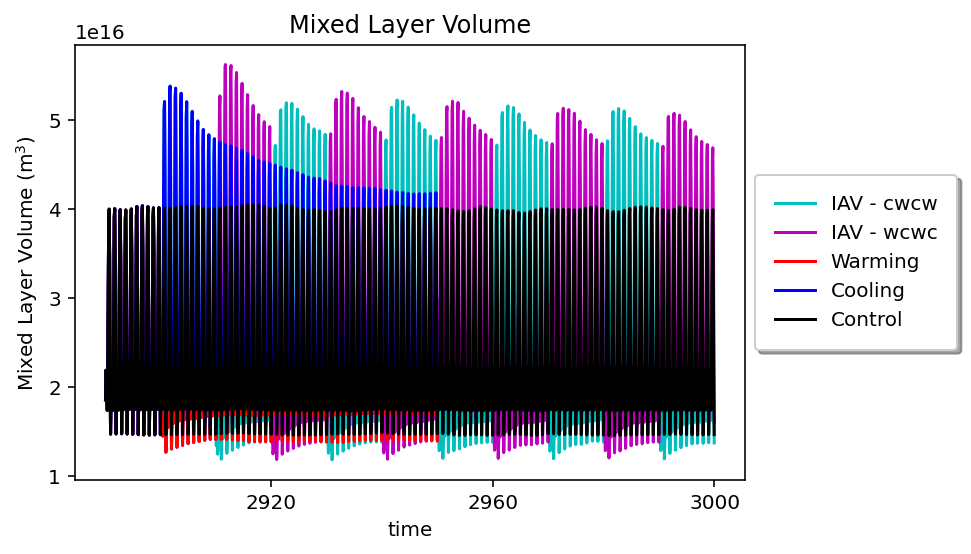

In [15]:
fig = plt.figure()
(mld_cwcw1*area_t_cont).sum('xt_ocean').sum('yt_ocean').plot(label='IAV - cwcw',color = 'c')
(mld_wcwc1*area_t_cont).sum('xt_ocean').sum('yt_ocean').plot(label='IAV - wcwc',color = 'm')
(mld_warm1*area_t_cont).sum('xt_ocean').sum('yt_ocean').plot(label='Warming',color = 'r')
(mld_cool1*area_t_cont).sum('xt_ocean').sum('yt_ocean').plot(label='Cooling',color = 'b')
(mld_cont1*area_t_cont).sum('xt_ocean').sum('yt_ocean').plot(label='Control',color = 'k')

plt.ylabel('Mixed Layer Volume (m$^3$)')
plt.title('Mixed Layer Volume')
plt.legend(fancybox=True, framealpha=1, shadow=True, borderpad=1,bbox_to_anchor=(1, 0.5),loc = 'center left')


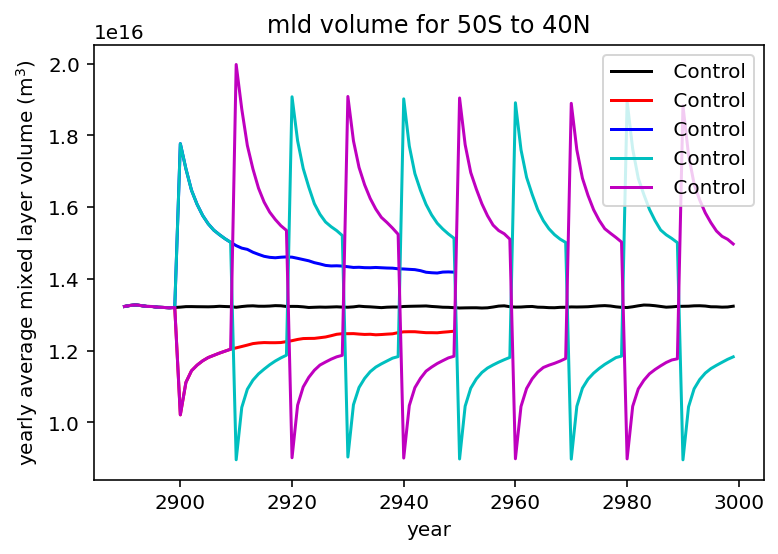

In [15]:
(mld_cont*area_t_cont).sel(yt_ocean = slice(-50,40)).sum('xt_ocean').sum('yt_ocean').plot(label=' Control',color = 'k')
(mld_warm*area_t_cont).sel(yt_ocean = slice(-50,40)).sum('xt_ocean').sum('yt_ocean').plot(label=' Control',color = 'r')
(mld_cool*area_t_cont).sel(yt_ocean = slice(-50,40)).sum('xt_ocean').sum('yt_ocean').plot(label=' Control',color = 'b')
(mld_cwcw*area_t_cont).sel(yt_ocean = slice(-50,40)).sum('xt_ocean').sum('yt_ocean').plot(label=' Control',color = 'c')
(mld_wcwc*area_t_cont).sel(yt_ocean = slice(-50,40)).sum('xt_ocean').sum('yt_ocean').plot(label=' Control',color = 'm')
plt.ylabel('yearly average mixed layer volume (m$^3$)')
plt.title('mld volume for 50S to 40N')
plt.legend()


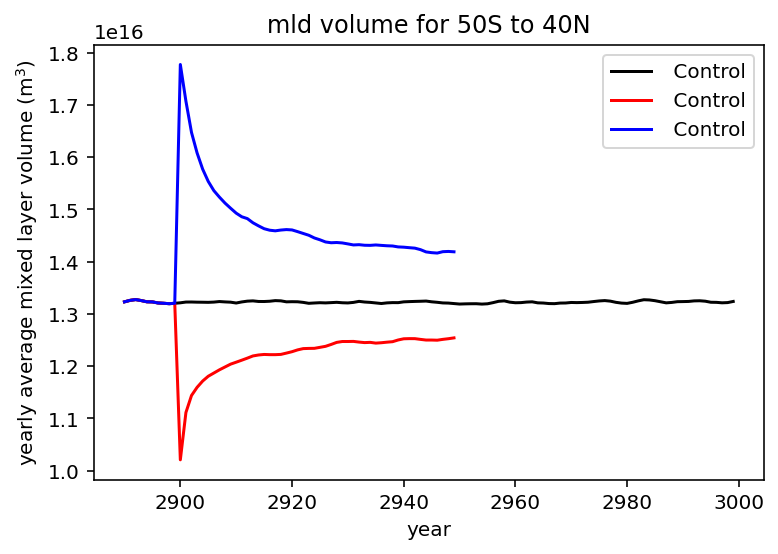

In [16]:
(mld_cont*area_t_cont).sel(yt_ocean = slice(-50,40)).sum('xt_ocean').sum('yt_ocean').plot(label=' Control',color = 'k')
(mld_warm*area_t_cont).sel(yt_ocean = slice(-50,40)).sum('xt_ocean').sum('yt_ocean').plot(label=' Control',color = 'r')
(mld_cool*area_t_cont).sel(yt_ocean = slice(-50,40)).sum('xt_ocean').sum('yt_ocean').plot(label=' Control',color = 'b')
#(mld_cwcw*area_t_cont).sel(yt_ocean = slice(-50,40)).sum('xt_ocean').sum('yt_ocean').plot(label=' Control',color = 'c')
#(mld_wcwc*area_t_cont).sel(yt_ocean = slice(-50,40)).sum('xt_ocean').sum('yt_ocean').plot(label=' Control',color = 'm')
plt.ylabel('yearly average mixed layer volume (m$^3$)')
plt.title('mld volume for 50S to 40N')
plt.legend()


# surface flux

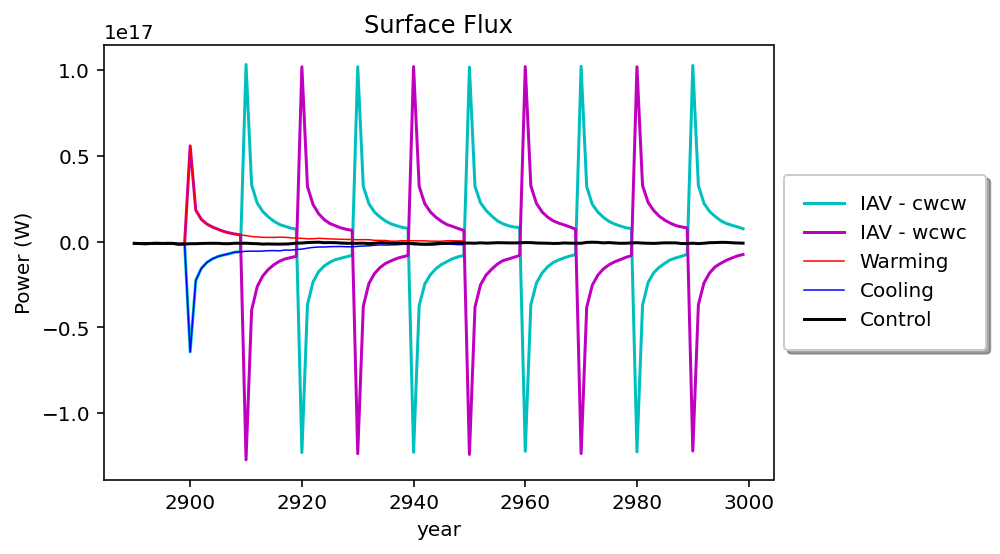

In [26]:
fig = plt.figure()
(surface_heat_flux_cwcw*area_t_cont).sum('xt_ocean').sum('yt_ocean').plot(label='IAV - cwcw',color = 'c')
(surface_heat_flux_wcwc*area_t_cont).sum('xt_ocean').sum('yt_ocean').plot(label='IAV - wcwc',color = 'm')
(surface_heat_flux_warm*area_t_cont).sum('xt_ocean').sum('yt_ocean').plot(label='Warming',color = 'r', linewidth = 0.75)
(surface_heat_flux_cool*area_t_cont).sum('xt_ocean').sum('yt_ocean').plot(label='Cooling',color = 'b', linewidth = 0.75)
(surface_heat_flux_cont*area_t_cont).sum('xt_ocean').sum('yt_ocean').plot(label='Control',color = 'k')

plt.ylabel('Power (W)')
plt.title('Surface Flux')
plt.legend(fancybox=True, framealpha=1, shadow=True, borderpad=1,bbox_to_anchor=(1, 0.5),loc = 'center left')


# amoc

In [19]:
%matplotlib inline

import cosima_cookbook as cc
import matplotlib.pyplot as plt
import numpy as np
import netCDF4 as nc
import xarray as xr
import cmocean as cm
from collections import OrderedDict
import cftime
import glob

import logging
logging.captureWarnings(True)
logging.getLogger('py.warnings').setLevel(logging.ERROR)

from dask.distributed import Client

In [20]:
exptdict = OrderedDict([
    ('Control',  {'expt':'1deg_jra55_ryf_RCPcont'}),
    ('Warming',  {'expt':'1deg_jra55_ryf_RCPwarmhumid'}),
    ('Warming x2',  {'expt':'1deg_jra55_ryf_RCPwarmhumid2x'}),
    ('Cooling',  {'expt':'1deg_jra55_ryf_RCPcoolhumid'}),
    ('Cooling x2',  {'expt':'1deg_jra55_ryf_RCPcoolhumid2x'}),
    ('Warming w/o humidity',  {'expt':'1deg_jra55_ryf_rcpwarm'}),
    ('Cooling w/o humidity',  {'expt':'1deg_jra55_ryf_rcpcool'}),
    ('Cooling w/o humidity2', {'expt':'1deg_jra55_ryf_RCPcool'}),
    ('Windup', {'expt':'1deg_jra55_ryf_red3DSK_C9'}),
    ('Cooling NA',  {'expt':'1deg_jra55_ryf_RCPcoolhumid_NA'}),
    ('Cooling SO',  {'expt':'1deg_jra55_ryf_RCPcoolhumid_SO'}),
    ('Warming NA',  {'expt':'1deg_jra55_ryf_RCPwarmhumid_NA'}),
    ('Warming SO',  {'expt':'1deg_jra55_ryf_RCPwarmhumid_SO'}),
    ('Warming PI',  {'expt':'1deg_jra55_ryf_RCPwarmhumid_PI'}),
    ('Cooling PI',  {'expt':'1deg_jra55_ryf_RCPcoolhumid_PI'}),
    ('IAV wcwc',  {'expt':'1deg_jra55_ryf_RCPwcwc'}),
    ('IAV cwcw',  {'expt':'1deg_jra55_ryf_RCPcwcw'})

])

1deg_jra55_ryf_RCPcont
1deg_jra55_ryf_RCPwarmhumid
1deg_jra55_ryf_RCPwcwc
1deg_jra55_ryf_RCPcoolhumid
1deg_jra55_ryf_RCPcwcw
CPU times: user 2min 31s, sys: 12.5 s, total: 2min 43s
Wall time: 2min 55s


Text(0, 0.5, 'Overturning (Sv)')

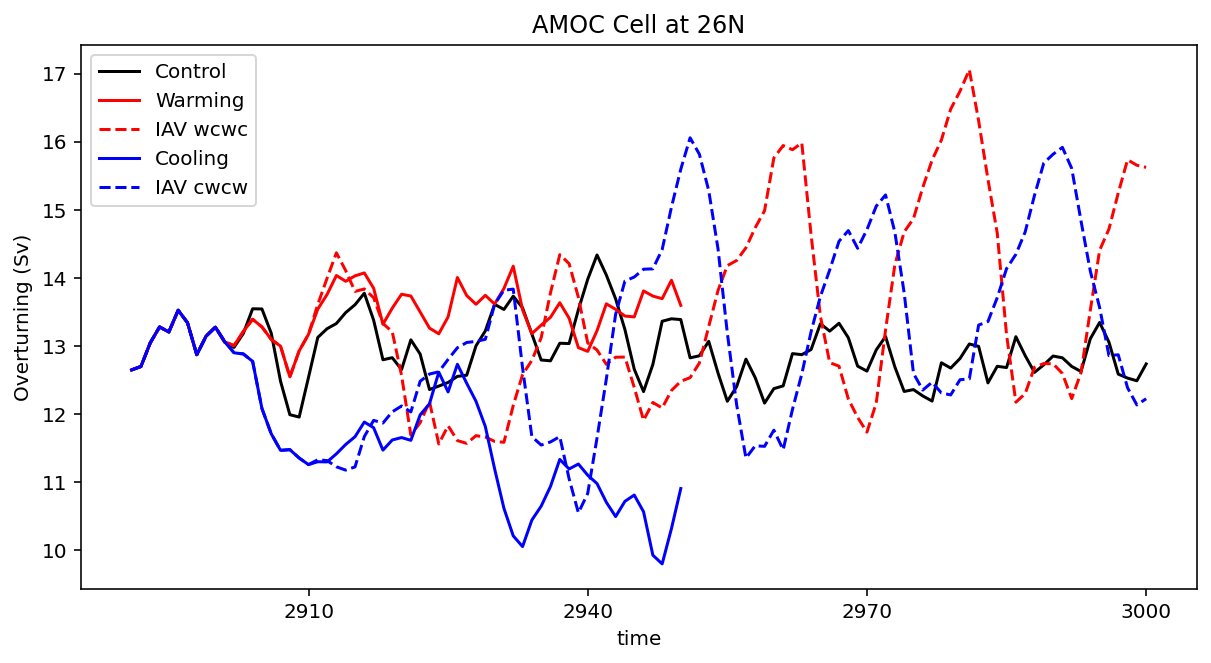

In [21]:
%%time
keys = ['Control','Warming','IAV wcwc','Cooling','IAV cwcw']
colors = {'Control': 'k','Warming': 'r','IAV wcwc': 'r','Cooling':'b','IAV cwcw':'b'}
linestyles = {'Control': '-','Warming': '-','IAV wcwc': '--','Cooling':'-','IAV cwcw':'--'}
start_time = '2900-01-01'
plt.figure(figsize=(10,5))
for ekey in keys:
    expt = exptdict[ekey]['expt']
    print(expt)
    var = cc.querying.getvar(expt,'ty_trans_rho',session,start_time = start_time )
    psi_amoc = var.sel(grid_xt_ocean=slice(-103,-5)).sum('grid_xt_ocean').sel(method='Nearest',grid_yu_ocean=26)*1.0e-9
    psi_amoc_sum = psi_amoc.cumsum('potrho') - psi_amoc.sum('potrho')
    
    try:
        var2 = cc.querying.getvar(expt,'ty_trans_rho_gm',session,start_time = start_time)
        psi_amoc_gm = var2.sel(grid_xt_ocean=slice(-103,-5)).sum('grid_xt_ocean').sel(method='Nearest',grid_yu_ocean=26)*1.0e-9
        psi_amoc_sum = psi_amoc_sum + psi_amoc_gm
    except:
        print('GM term not found')
        
    psi_amoc_sum = psi_amoc_sum.sel(potrho=slice(1035.5,None)).max('potrho').resample(time='Y').mean()
    psi_amoc_sum.plot(label=ekey,color=colors[ekey], linestyle = linestyles[ekey])
xlims = plt.xlim()
#plt.plot(xlims,[17.2,17.2],'--k',label='RAPID (McCarthy et al. 2015)')
plt.legend()
plt.title('AMOC Cell at 26N')
plt.ylabel('Overturning (Sv)')

# vertical temperature profile

scaled so if in w phase it is positive, and dashed means 10 years later, and we want to see the red ones being net colder

1deg_jra55_ryf_RCPwcwc
1deg_jra55_ryf_RCPcwcw
CPU times: user 1min 10s, sys: 2.72 s, total: 1min 13s
Wall time: 56.5 s


Text(0, 0.5, 'Depth (m)')

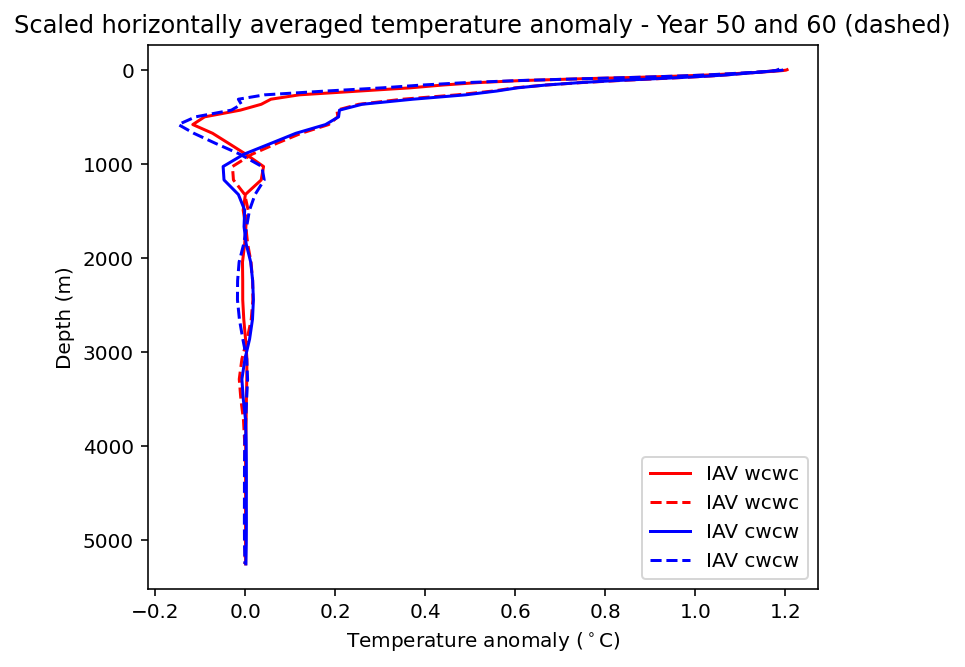

In [26]:
%%time
keys = ['IAV wcwc','IAV cwcw']
colors = {'Control': 'k','Warming': 'r','IAV wcwc': 'r','Cooling':'b','IAV cwcw':'b'}
linestyles = {'Control': '-','Warming': '-','IAV wcwc': '-','Cooling':'-','IAV cwcw':'-'}
factor = {'Control': 1,'Warming': 1,'IAV wcwc': 1,'Cooling':-1,'IAV cwcw':-1}
legend = {'Control': 'Control','Warming': 'Warming','Warming x2':'0.5 Warming x2','Cooling':'- Cooling','Cooling x2':'-0.5 Cooling x2'}

start_time = '2900-01-01'
plt.figure(figsize=(6,5))
temp_cont = cc.querying.getvar('1deg_jra55_ryf_RCPcont','temp',session, ncfile = 'ocean.nc', start_time = '2900-01-01')
for ekey in keys:
    expt = exptdict[ekey]['expt']
    print(expt)
    temp = cc.querying.getvar(expt,'temp',session, ncfile = 'ocean.nc', start_time = '2900-01-01')
    temp_anom = temp-temp_cont
    area_t = cc.querying.getvar(expt,'area_t',session, n=1, ncfile = 'ocean_grid.nc', start_time = '2900-01-01')#.mean('time')
    mask = temp.isel(time=0).copy()
    mask = mask/mask                 
    area = mask*area_t
    area_sum = area.sum('xt_ocean').sum('yt_ocean')
    #IPython.display.clear_output()
    var =area_t*temp_anom
    temp_hov = var.sum('xt_ocean').sum('yt_ocean').compute()
    temp_hov = temp_hov/area_sum*factor[ekey]
    temp_hov.isel(time = 59).plot(y = 'st_ocean', yincrease = False, label=ekey,color=colors[ekey], linestyle = linestyles[ekey])
    (-1*temp_hov).isel(time = 69).plot(y = 'st_ocean', yincrease = False, label=ekey,color=colors[ekey], linestyle = '--')
#xlims = plt.xlim()
#plt.plot(xlims,[17.2,17.2],'--k',label='RAPID (McCarthy et al. 2015)')
plt.legend(loc = 'lower right')
plt.title('Scaled horizontally averaged temperature anomaly - Year 50 and 60 (dashed)')
plt.xlabel('Temperature anomaly ($^\circ$C)')
plt.ylabel('Depth (m)')
#plt.savefig('figures/scaledtempvertical')

1deg_jra55_ryf_RCPwcwc
1deg_jra55_ryf_RCPcwcw
CPU times: user 1min 14s, sys: 7.28 s, total: 1min 21s
Wall time: 1min 1s


Text(0, 0.5, 'Depth (m)')

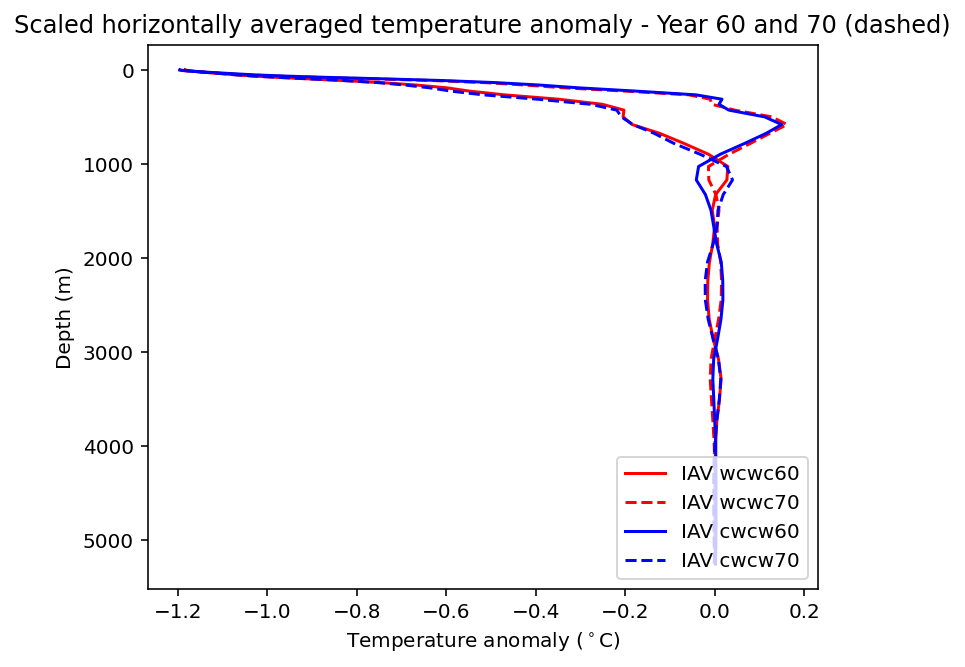

In [25]:
%%time
keys = ['IAV wcwc','IAV cwcw']
colors = {'Control': 'k','Warming': 'r','IAV wcwc': 'r','Cooling':'b','IAV cwcw':'b'}
linestyles = {'Control': '-','Warming': '-','IAV wcwc': '-','Cooling':'-','IAV cwcw':'-'}
factor = {'Control': 1,'Warming': 1,'IAV wcwc': 1,'Cooling':-1,'IAV cwcw':-1}
legend = {'Control': 'Control','Warming': 'Warming','Warming x2':'0.5 Warming x2','Cooling':'- Cooling','Cooling x2':'-0.5 Cooling x2'}

start_time = '2900-01-01'
plt.figure(figsize=(6,5))
temp_cont = cc.querying.getvar('1deg_jra55_ryf_RCPcont','temp',session, ncfile = 'ocean.nc', start_time = '2900-01-01')
for ekey in keys:
    expt = exptdict[ekey]['expt']
    print(expt)
    temp = cc.querying.getvar(expt,'temp',session, ncfile = 'ocean.nc', start_time = '2900-01-01')
    temp_anom = temp-temp_cont
    area_t = cc.querying.getvar(expt,'area_t',session, n=1, ncfile = 'ocean_grid.nc', start_time = '2900-01-01')#.mean('time')
    mask = temp.isel(time=0).copy()
    mask = mask/mask                 
    area = mask*area_t
    area_sum = area.sum('xt_ocean').sum('yt_ocean')
    #IPython.display.clear_output()
    var =area_t*temp_anom
    temp_hov = var.sum('xt_ocean').sum('yt_ocean').compute()
    temp_hov = temp_hov/area_sum*factor[ekey]
    temp_hov.isel(time = 69).plot(y = 'st_ocean', yincrease = False, label=ekey+str(60),color=colors[ekey], linestyle = linestyles[ekey])
    (-1*temp_hov).isel(time = 79).plot(y = 'st_ocean', yincrease = False, label=ekey+str(70),color=colors[ekey], linestyle = '--')
#xlims = plt.xlim()
#plt.plot(xlims,[17.2,17.2],'--k',label='RAPID (McCarthy et al. 2015)')
plt.legend(loc = 'lower right')
plt.title('Scaled horizontally averaged temperature anomaly - Year 60 and 70 (dashed)')
plt.xlabel('Temperature anomaly ($^\circ$C)')
plt.ylabel('Depth (m)')
#plt.savefig('figures/scaledtempvertical')

1deg_jra55_ryf_RCPwcwc
1deg_jra55_ryf_RCPcwcw
CPU times: user 1min 10s, sys: 5.62 s, total: 1min 15s
Wall time: 57.5 s


Text(0, 0.5, 'Depth (m)')

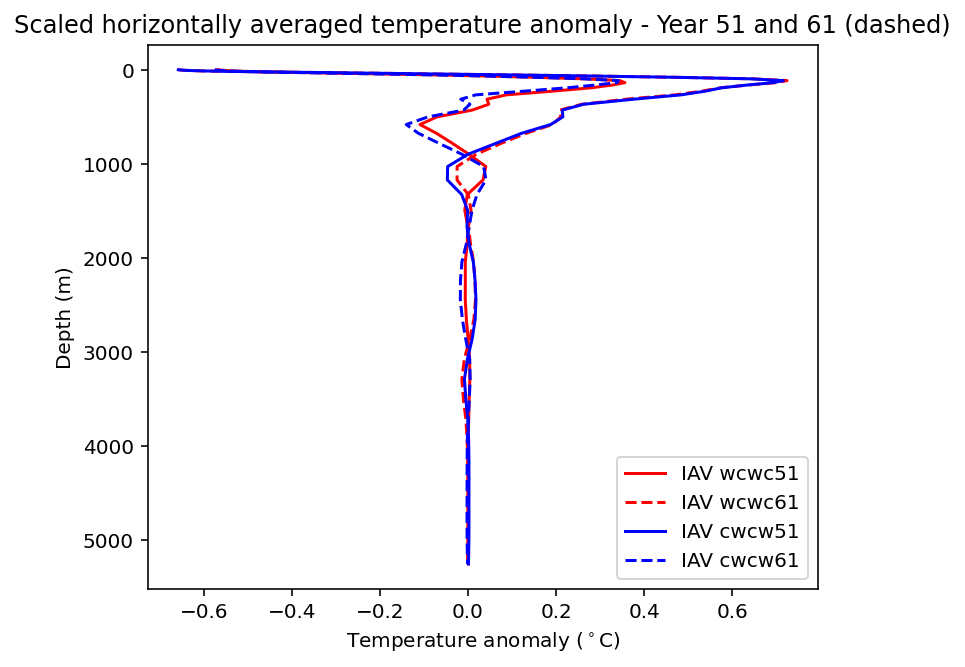

In [24]:
%%time
keys = ['IAV wcwc','IAV cwcw']
colors = {'Control': 'k','Warming': 'r','IAV wcwc': 'r','Cooling':'b','IAV cwcw':'b'}
linestyles = {'Control': '-','Warming': '-','IAV wcwc': '-','Cooling':'-','IAV cwcw':'-'}
factor = {'Control': 1,'Warming': 1,'IAV wcwc': 1,'Cooling':-1,'IAV cwcw':-1}
legend = {'Control': 'Control','Warming': 'Warming','Warming x2':'0.5 Warming x2','Cooling':'- Cooling','Cooling x2':'-0.5 Cooling x2'}

start_time = '2900-01-01'
plt.figure(figsize=(6,5))
temp_cont = cc.querying.getvar('1deg_jra55_ryf_RCPcont','temp',session, ncfile = 'ocean.nc', start_time = '2900-01-01')
for ekey in keys:
    expt = exptdict[ekey]['expt']
    print(expt)
    temp = cc.querying.getvar(expt,'temp',session, ncfile = 'ocean.nc', start_time = '2900-01-01')
    temp_anom = temp-temp_cont
    area_t = cc.querying.getvar(expt,'area_t',session, n=1, ncfile = 'ocean_grid.nc', start_time = '2900-01-01')#.mean('time')
    mask = temp.isel(time=0).copy()
    mask = mask/mask                 
    area = mask*area_t
    area_sum = area.sum('xt_ocean').sum('yt_ocean')
    #IPython.display.clear_output()
    var =area_t*temp_anom
    temp_hov = var.sum('xt_ocean').sum('yt_ocean').compute()
    temp_hov = temp_hov/area_sum*factor[ekey]
    temp_hov.isel(time = 60).plot(y = 'st_ocean', yincrease = False, label=ekey+str(51),color=colors[ekey], linestyle = linestyles[ekey])
    (-1*temp_hov).isel(time = 70).plot(y = 'st_ocean', yincrease = False, label=ekey+str(61),color=colors[ekey], linestyle = '--')
#xlims = plt.xlim()
#plt.plot(xlims,[17.2,17.2],'--k',label='RAPID (McCarthy et al. 2015)')
plt.legend(loc = 'lower right')
plt.title('Scaled horizontally averaged temperature anomaly - Year 51 and 61 (dashed)')
plt.xlabel('Temperature anomaly ($^\circ$C)')
plt.ylabel('Depth (m)')
#plt.savefig('figures/scaledtempvertical')

1deg_jra55_ryf_RCPwcwc
1deg_jra55_ryf_RCPcwcw
CPU times: user 1min 11s, sys: 2.75 s, total: 1min 14s
Wall time: 57.3 s


Text(0, 0.5, 'Depth (m)')

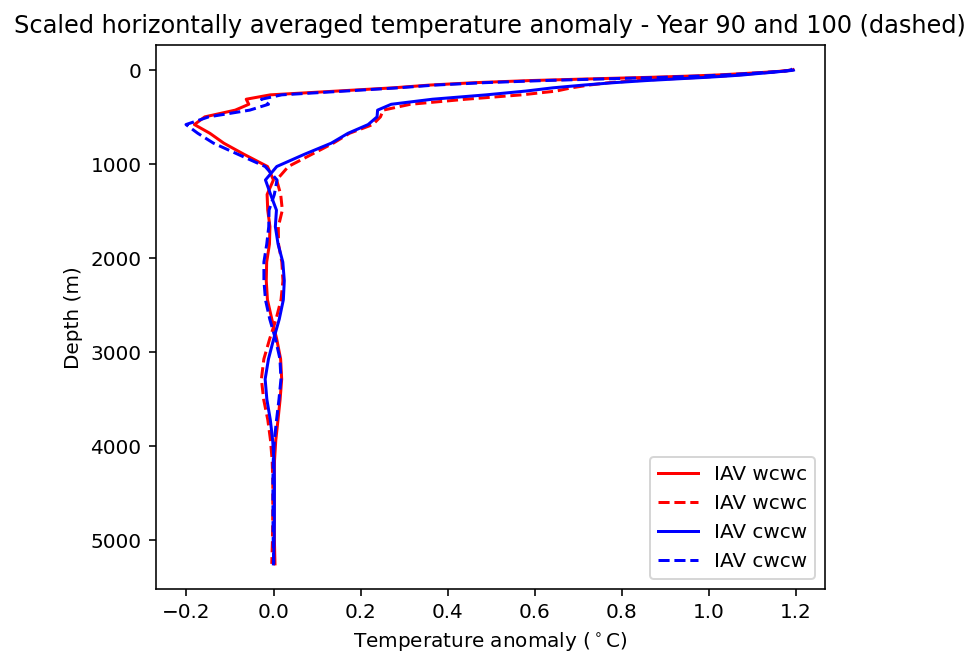

In [27]:
%%time
keys = ['IAV wcwc','IAV cwcw']
colors = {'Control': 'k','Warming': 'r','IAV wcwc': 'r','Cooling':'b','IAV cwcw':'b'}
linestyles = {'Control': '-','Warming': '-','IAV wcwc': '-','Cooling':'-','IAV cwcw':'-'}
factor = {'Control': 1,'Warming': 1,'IAV wcwc': 1,'Cooling':-1,'IAV cwcw':-1}
legend = {'Control': 'Control','Warming': 'Warming','Warming x2':'0.5 Warming x2','Cooling':'- Cooling','Cooling x2':'-0.5 Cooling x2'}

start_time = '2900-01-01'
plt.figure(figsize=(6,5))
temp_cont = cc.querying.getvar('1deg_jra55_ryf_RCPcont','temp',session, ncfile = 'ocean.nc', start_time = '2900-01-01')
for ekey in keys:
    expt = exptdict[ekey]['expt']
    print(expt)
    temp = cc.querying.getvar(expt,'temp',session, ncfile = 'ocean.nc', start_time = '2900-01-01')
    temp_anom = temp-temp_cont
    area_t = cc.querying.getvar(expt,'area_t',session, n=1, ncfile = 'ocean_grid.nc', start_time = '2900-01-01')#.mean('time')
    mask = temp.isel(time=0).copy()
    mask = mask/mask                 
    area = mask*area_t
    area_sum = area.sum('xt_ocean').sum('yt_ocean')
    #IPython.display.clear_output()
    var =area_t*temp_anom
    temp_hov = var.sum('xt_ocean').sum('yt_ocean').compute()
    temp_hov = temp_hov/area_sum*factor[ekey]
    temp_hov.isel(time = 99).plot(y = 'st_ocean', yincrease = False, label=ekey,color=colors[ekey], linestyle = linestyles[ekey])
    (-1*temp_hov).isel(time = 109).plot(y = 'st_ocean', yincrease = False, label=ekey,color=colors[ekey], linestyle = '--')
#xlims = plt.xlim()
#plt.plot(xlims,[17.2,17.2],'--k',label='RAPID (McCarthy et al. 2015)')
plt.legend(loc = 'lower right')
plt.title('Scaled horizontally averaged temperature anomaly - Year 90 and 100 (dashed)')
plt.xlabel('Temperature anomaly ($^\circ$C)')
plt.ylabel('Depth (m)')
#plt.savefig('figures/scaledtempvertical')

In [ ]:
%%time
keys = ['IAV wcwc','IAV cwcw']
colors = {'Control': 'k','Warming': 'r','IAV wcwc': 'r','Cooling':'b','IAV cwcw':'b'}
linestyles = {'Control': '-','Warming': '-','IAV wcwc': '-','Cooling':'-','IAV cwcw':'-'}
factor = {'Control': 1,'Warming': 1,'IAV wcwc': 1,'Cooling':-1,'IAV cwcw':-1}
legend = {'Control': 'Control','Warming': 'Warming','Warming x2':'0.5 Warming x2','Cooling':'- Cooling','Cooling x2':'-0.5 Cooling x2'}

start_time = '2900-01-01'
plt.figure(figsize=(6,5))
temp_cont = cc.querying.getvar('1deg_jra55_ryf_RCPcont','temp',session, ncfile = 'ocean.nc', start_time = '2900-01-01')
for ekey in keys:
    expt = exptdict[ekey]['expt']
    print(expt)
    temp = cc.querying.getvar(expt,'temp',session, ncfile = 'ocean.nc', start_time = '2900-01-01')
    temp_anom = temp-temp_cont
    area_t = cc.querying.getvar(expt,'area_t',session, n=1, ncfile = 'ocean_grid.nc', start_time = '2900-01-01')#.mean('time')
    mask = temp.isel(time=0).copy()
    mask = mask/mask                 
    area = mask*area_t
    area_sum = area.sum('xt_ocean').sum('yt_ocean')
    #IPython.display.clear_output()
    var =area_t*temp_anom
    temp_hov = var.sum('xt_ocean').sum('yt_ocean').compute()
    temp_hov = temp_hov/area_sum*factor[ekey]
    temp_hov.isel(time = 94).plot(y = 'st_ocean', yincrease = False, label=ekey,color=colors[ekey], linestyle = linestyles[ekey])
    (-1*temp_hov).isel(time = 104).plot(y = 'st_ocean', yincrease = False, label=ekey,color=colors[ekey], linestyle = '--')
#xlims = plt.xlim()
#plt.plot(xlims,[17.2,17.2],'--k',label='RAPID (McCarthy et al. 2015)')
plt.legend(loc = 'lower right')
plt.title('Scaled horizontally averaged temperature anomaly - Year 85 and 95 (dashed)')
plt.xlabel('Temperature anomaly ($^\circ$C)')
plt.ylabel('Depth (m)')
#plt.savefig('figures/scaledtempvertical')

1deg_jra55_ryf_RCPwcwc
1deg_jra55_ryf_RCPcwcw


1deg_jra55_ryf_RCPwcwc
1deg_jra55_ryf_RCPcwcw
CPU times: user 1min 10s, sys: 2.66 s, total: 1min 13s
Wall time: 56.4 s


Text(0, 0.5, 'Depth (m)')

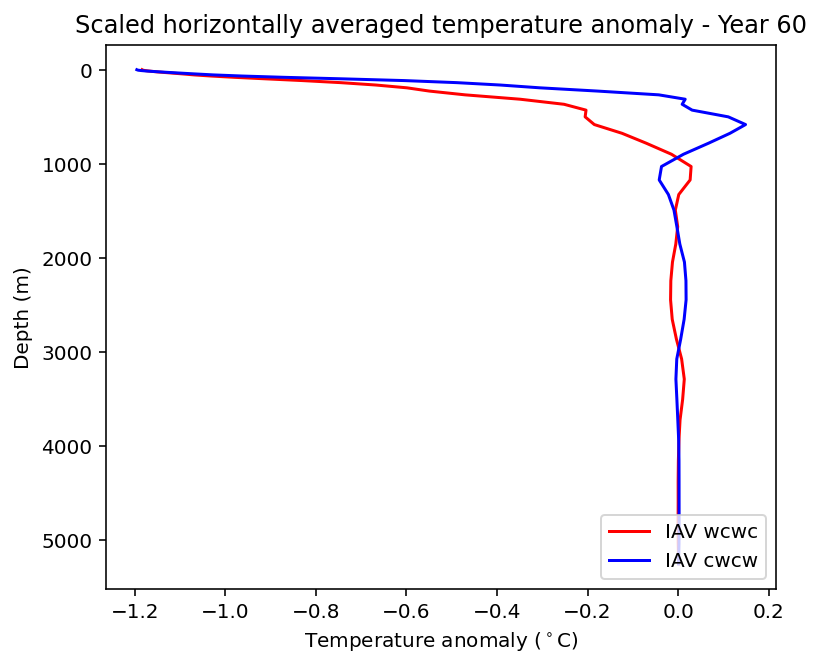

In [24]:
%%time
keys = ['IAV wcwc','IAV cwcw']
colors = {'Control': 'k','Warming': 'r','IAV wcwc': 'r','Cooling':'b','IAV cwcw':'b'}
linestyles = {'Control': '-','Warming': '-','IAV wcwc': '-','Cooling':'-','IAV cwcw':'-'}
factor = {'Control': 1,'Warming': 1,'IAV wcwc': 1,'Cooling':-1,'IAV cwcw':-1}
legend = {'Control': 'Control','Warming': 'Warming','Warming x2':'0.5 Warming x2','Cooling':'- Cooling','Cooling x2':'-0.5 Cooling x2'}

start_time = '2900-01-01'
plt.figure(figsize=(6,5))
temp_cont = cc.querying.getvar('1deg_jra55_ryf_RCPcont','temp',session, ncfile = 'ocean.nc', start_time = '2900-01-01')
for ekey in keys:
    expt = exptdict[ekey]['expt']
    print(expt)
    temp = cc.querying.getvar(expt,'temp',session, ncfile = 'ocean.nc', start_time = '2900-01-01')
    temp_anom = temp-temp_cont
    area_t = cc.querying.getvar(expt,'area_t',session, n=1, ncfile = 'ocean_grid.nc', start_time = '2900-01-01')#.mean('time')
    mask = temp.isel(time=0).copy()
    mask = mask/mask                 
    area = mask*area_t
    area_sum = area.sum('xt_ocean').sum('yt_ocean')
    #IPython.display.clear_output()
    var =area_t*temp_anom
    temp_hov = var.sum('xt_ocean').sum('yt_ocean').compute()
    temp_hov = temp_hov/area_sum*factor[ekey]
    temp_hov.isel(time = 69).plot(y = 'st_ocean', yincrease = False, label=ekey,color=colors[ekey], linestyle = linestyles[ekey])
#xlims = plt.xlim()
#plt.plot(xlims,[17.2,17.2],'--k',label='RAPID (McCarthy et al. 2015)')
plt.legend(loc = 'lower right')
plt.title('Scaled horizontally averaged temperature anomaly - Year 60')
plt.xlabel('Temperature anomaly ($^\circ$C)')
plt.ylabel('Depth (m)')
#plt.savefig('figures/scaledtempvertical')